In [2]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd

/home/safwan/virenv/base3.8/lib/python3.8/site-packages/bagpy/bagreader.py:121: UserWarning: There is a newer version of bagpy available on PyPI:

Your version: 	
0.4.5
Latest version: 	
0.4.6
Consider updating it by using command pip install --upgrade bagpy
  warnings.warn("{}\n{}\n{}\n{}\n{}\n{}".format(


In [3]:
file_path = '/home/safwan/Documents/shared_files/cyverse/2T3W1RFV0MC103811/bagfiles/2021_07_14/2021_07_14_16_21_57_2T3W1RFV0MC103811following_real_vehicle_micromodel.bag'
b = bagreader(file_path)

[INFO]  Data folder /home/safwan/Documents/shared_files/cyverse/2T3W1RFV0MC103811/bagfiles/2021_07_14/2021_07_14_16_21_57_2T3W1RFV0MC103811following_real_vehicle_micromodel already exists. Not creating.


In [4]:
filename = file_path.split('/')[-1]

In [5]:
b.topic_table

Topics                       Types  Message Count     Frequency
0            /accel            std_msgs/Float64          14374    181.721069
1        /cmd_accel            std_msgs/Float64          14339    393.406556
2          /cmd_vel         geometry_msgs/Twist           2873     19.968740
3         /commands            std_msgs/Float64          14394    100.033485
4        /highbeams            std_msgs/Float64            144      0.999912
5        /lead_dist            std_msgs/Float64           1436     48.359917
6          /rel_vel         geometry_msgs/Twist           2268     23.623493
7           /rosout           rosgraph_msgs/Log             10  32768.000000
8       /rosout_agg           rosgraph_msgs/Log             14  35246.252101
9   /steering_angle            std_msgs/Float64          14408    100.795540
10        /track_a0  geometry_msgs/PointStamped           2884     19.984581
11        /track_a1  geometry_msgs/PointStamped           2884     20.002022
12       /track_a10  geometry_msgs/PointStamped           2879     19.993346
13       /track_a11  geometry_msgs/PointStamped           2879     19.996491
14       /track_a12  geometry_msgs/PointStamped           2879     19.996348
15       /track_a13  geometry_msgs/PointStamped           2879     20.001068
16       /track_a14  geometry_msgs/PointStamped           2879     19.996491
17       /track_a15  geometry_msgs/PointStamped           2875     19.983010
18        /track_a2  geometry_msgs/PointStamped           2882     19.995824
19        /track_a3  geometry_msgs/PointStamped           2884     20.008319
20        /track_a4  geometry_msgs/PointStamped           2882     20.004502
21        /track_a5  geometry_msgs/PointStamped           2882     19.977823
22        /track_a6  geometry_msgs/PointStamped           2882     19.996110
23        /track_a7  geometry_msgs/PointStamped           2882     19.981535
24        /track_a8  geometry_msgs/PointStamped           2884     19.984391
25        /track_a9  geometry_msgs/PointStamped           2884     19.997254
26           /v_des         geometry_msgs/Twist           2873     19.967789
27          /v_des2         geometry_msgs/Twist           2877     19.965175
28             /vel         geometry_msgs/Twist           7187     50.011375

In [13]:
CMD_ACC_MSG = b.message_by_topic('/cmd_accel') #commanded accel
ACC_MSG = b.message_by_topic('/accel') # car accel
CMD_VEL = b.message_by_topic('/cmd_vel')
LEAD_DIST = b.message_by_topic('/lead_dist') #lead dist
VEL_MSG = b.message_by_topic('/vel') # velocty 
V_DES = b.message_by_topic('/v_des')
V_DES2 = b.message_by_topic('/v_des2')

In [15]:
df_cacc = pd.read_csv(CMD_ACC_MSG)
df_acc = pd.read_csv(ACC_MSG)
# df_gvel = pd.read_csv(GHOST_VEL_MSG)
df_lead_dist = pd.read_csv(LEAD_DIST)
df_vel = pd.read_csv(VEL_MSG)
df_v_des = pd.read_csv(V_DES)
df_v_des2 = pd.read_csv(V_DES2)
df_cmd_vel = pd.read_csv(CMD_VEL)
t0 = df_vel['Time'][0]

In [16]:
df_cmd_vel

Time   linear.x  linear.y  linear.z  angular.x  angular.y  \
0     1.626305e+09   0.000000       0.0       0.0        0.0        0.0   
1     1.626305e+09   0.000000       0.0       0.0        0.0        0.0   
2     1.626305e+09   0.000000       0.0       0.0        0.0        0.0   
3     1.626305e+09   0.000000       0.0       0.0        0.0        0.0   
4     1.626305e+09   0.000000       0.0       0.0        0.0        0.0   
...            ...        ...       ...       ...        ...        ...   
2868  1.626305e+09  33.191737       0.0       0.0        0.0        0.0   
2869  1.626305e+09  33.158212       0.0       0.0        0.0        0.0   
2870  1.626305e+09  33.124687       0.0       0.0        0.0        0.0   
2871  1.626305e+09  33.091237       0.0       0.0        0.0        0.0   
2872  1.626305e+09  33.057787       0.0       0.0        0.0        0.0   

      angular.z  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
2868        0.0  
2869        0.0  
2870        0.0  
2871        0.0  
2872        0.0  

[2873 rows x 7 columns]

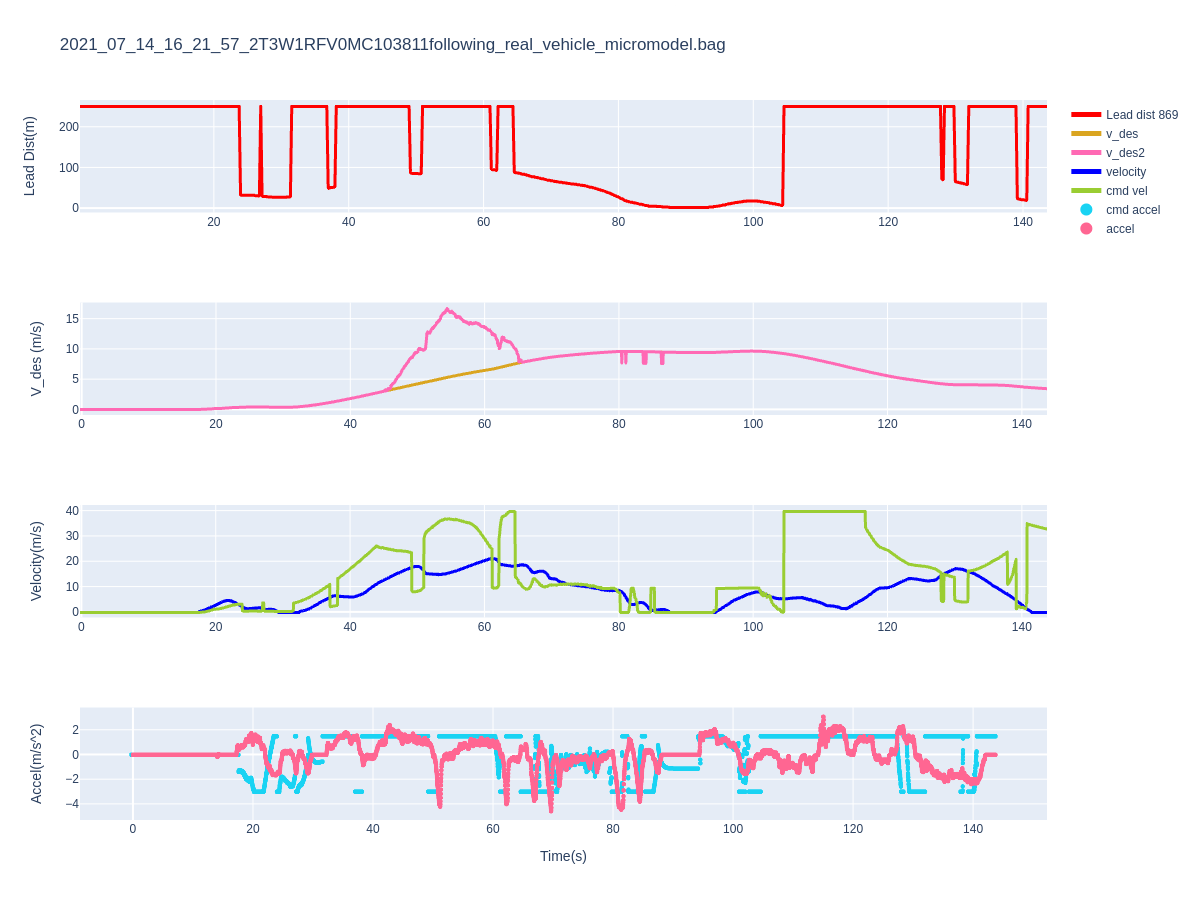

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
figr = make_subplots(rows=4, cols=1, subplot_titles=("", ""))

figr.append_trace(go.Scattergl(
    x=df_lead_dist['Time']-t0,
    y=df_lead_dist['data'],
     name="Lead dist 869",
      line=dict(
        width=3,
          color="red",
     ),
), row=1, col=1)

figr.append_trace(go.Scattergl(
    x=df_v_des['Time']-t0,
    y=df_v_des['linear.x'],
     name="v_des",
      line=dict(
        width=3,
          color="goldenrod",
     ),
), row=2, col=1)

figr.append_trace(go.Scattergl(
    x=df_v_des2['Time']-t0,
    y=df_v_des2['linear.x'],
     name="v_des2",
      line=dict(
        width=3,
          color="hotpink",
     ),
), row=2, col=1)



figr.append_trace(go.Scattergl(
    x=df_vel['Time']-t0,
    y=df_vel['linear.x'],
          line=dict(
        width=3,
          color="blue",
     ),
    name="velocity",
), row=3, col=1)

figr.append_trace(go.Scattergl(
    x=df_cmd_vel['Time']-t0,
    y=df_cmd_vel['linear.x'],
          line=dict(
        width=3,
          color="yellowgreen",
     ),
    name="cmd vel",
), row=3, col=1)


figr.append_trace(go.Scattergl(
    x=df_cacc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_cacc['data'],
       mode='markers',
          marker=dict(
            size=5,
          ),
    name="cmd accel",
), row=4, col=1)
figr.append_trace(go.Scattergl(
    x=df_acc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_acc['data'],
       mode='markers',
          marker=dict(
            size=5,
          ),
    name="accel",
), row=4, col=1)

figr.update_xaxes(title_text="Time(s)", row=4, col=1)

figr.update_yaxes(title_text="Lead Dist(m)", row=1, col=1)
figr.update_yaxes(title_text="V_des (m/s)", row=2, col=1)
figr.update_yaxes(title_text="Velocity(m/s)", row=3, col=1)
figr.update_yaxes(title_text="Accel(m/s^2)", row=4, col=1)




figr.update_layout(height=900, width=800, legend = {'itemsizing': 'constant'} ,title_text=filename)
figr.show()